## 패션 MNIST 데이터 셋 인식시켜 보기

In [6]:
import tensorflow as tf

In [7]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()
print("x_train:%s y_train:%s x_test:%s y_test:%s" %(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train:(60000, 28, 28) y_train:(60000,) x_test:(10000, 28, 28) y_test:(10000,)


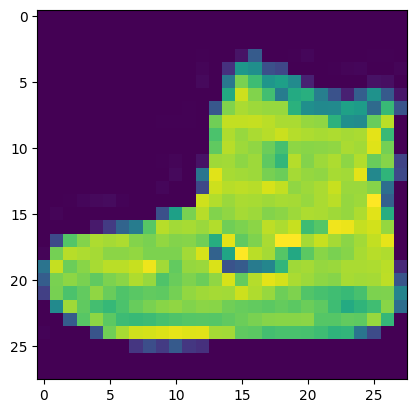

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()

In [9]:
for y in range(28):
    for x in range(28):
        print("%4s" %x_train[0][y][x], end=' ')
    print()    
    

   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
   0    0    0    0    0    0    0    0    0    0    0    0    1    0    0   13   73    0    0    1    4    0    0    0    0    1    1    0 
   0    0    0    0    0    0    0    0    0    0    0    0    3    0   36  136  127   62   54    0    0    0    1    3    4    0    0    3 
   0    0    0    0    0    0    0    0    0    0    0    0    6    0  102  204  176  134  144  123   23    0    0    0    0   12   10    0 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0  155  236  207  178  107  156  161  109   64   23   77  130   72   15 
   0    0    

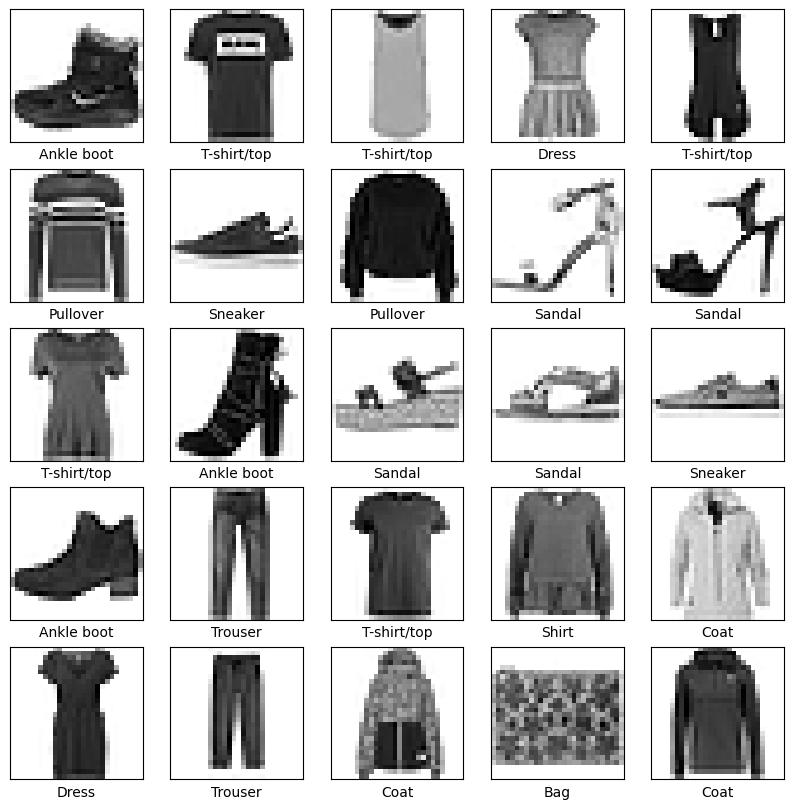

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [16]:
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = x_train.reshape(60000, 784), x_test.reshape(10000, 784)

model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(784,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500)
model.evaluate(x_test, y_test)

p_test = model.predict(x_test)
print('p_text[0] : ', p_test[0])

c:\Users\kahn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step - accuracy: 0.5765 - loss: 1.4756
Epoch 2/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.7657 - loss: 0.6581
Epoch 3/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.7955 - loss: 0.5713
Epoch 4/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.8172 - loss: 0.5194
Epoch 5/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.8287 - loss: 0.4900
Epoch 6/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8363 - loss: 0.4660
Epoch 7/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.8377 - loss: 0.4627
Epoch 8/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.8444 - loss: 0.4447
Epoch 9/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8512 - loss: 0.4269
Epoch 10/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8510 - loss: 0.4213
Epoch 11/500
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8531 - loss: 0.42

p_test[0] :  9 Ankle boot y_test[0] :  9 Ankle boot


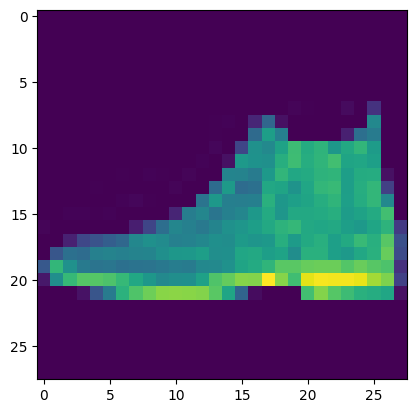

In [17]:
import numpy as np

print( 'p_test[0] : ', np.argmax(p_test[0]), class_names[np.argmax(p_test[0])],
       'y_test[0] : ', y_test[0], class_names[y_test[0]])

x_test = x_test.reshape(10000, 28, 28)

plt.figure()
plt.imshow(x_test[0])
plt.show()

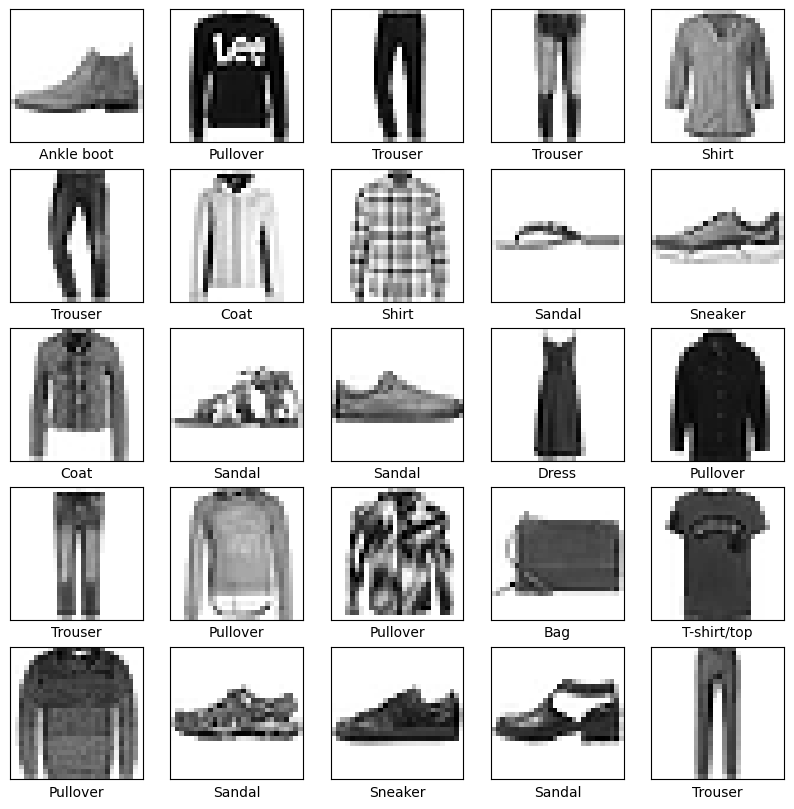

In [18]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(p_test[i])])
plt.show()  

In [20]:
cnt_wrong = 0
p_wrong= []
for i in range(10000):
    if np.argmax(p_test[i]) != y_test[i]:
        p_wrong.append(i)
        cnt_wrong +=1
        
print('cnt_wrong : ', cnt_wrong)
print('predicted wrong 10 : ', p_wrong[:10])

cnt_wrong :  1146
predicted wrong 10 :  [12, 14, 17, 23, 25, 40, 42, 49, 51, 57]


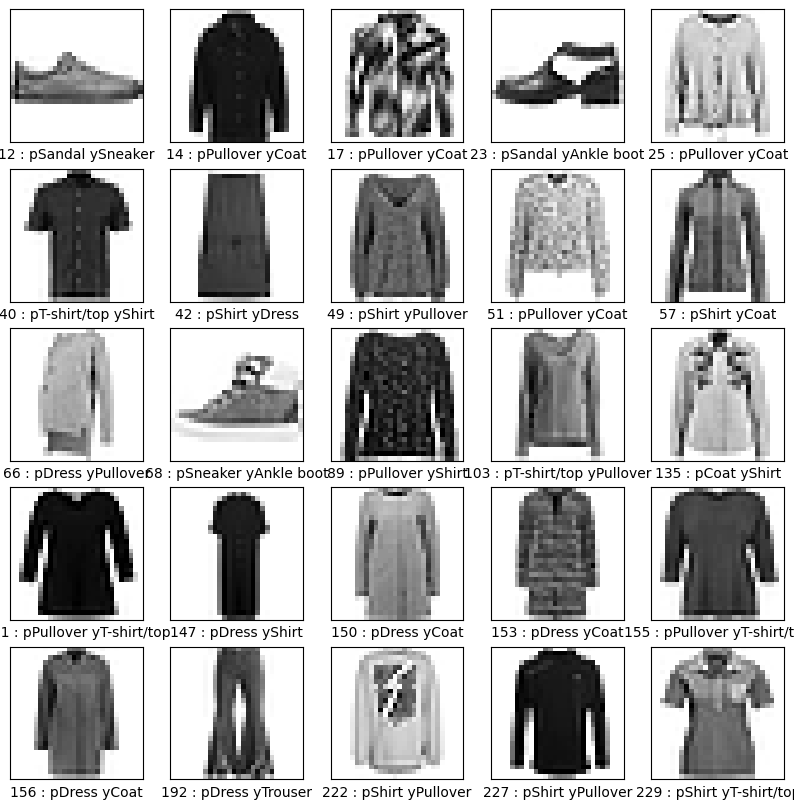

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[p_wrong[i]], cmap=plt.cm.binary)
    plt.xlabel( "%s : p%s y%s" %(p_wrong[i], class_names[np.argmax(p_test[p_wrong[i]])],
                                 class_names[y_test[p_wrong[i]]]))
plt.show()